[[249 246 241]
 [242 243 246]
 [249 246 243]
 ...
 [ 16  17  17]
 [ 17  18  17]
 [ 16  19  17]]
(200000, 3)


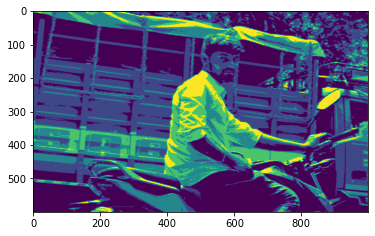

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image=cv.imread("sanjeev.jpg")
image=cv.resize(image,(1000,600))

"""this is the our choice to chanege the RGB or GRAY,HVS"""
#image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)



"""this is the chage the 3D shape to 2D shape"""
#RESHAPE THE IMAGE TO A 2D  ARRAY OF PIXELS AND 3 COLOR VALUES (RGB)
pixel_values=image.reshape((-1,3))
print(pixel_values)

"""the pixel convert to floating numbers(algorithm expert only float numbers)"""
pixel_values=np.float32(pixel_values)
print(pixel_values.shape)

#define stopping criteria
"""100 is conducted itreting of the perticular image 0.2 is eplian value depend on the accuracy
this is known as eplian_accuracy
"""
criteria=(cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER,100,0.2)

#NO.OF CLUSTERS(K) 1,2,3.......etc.
k=5
"""(original image,k value, None, criteria, attempt, random_centers)"""
_,labels,(centers)=cv.kmeans(pixel_values,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)


#COnvert back to 8 bit values
centers=np.uint8(centers)

#flatten the labels array
labels=labels.flatten()

#convert all pixels to the color of the centroids
segmented_image=centers[labels.flatten()]

#reshape back to the original image dimension
segmented_image=segmented_image.reshape(image.shape)

#show() the image
plt.imshow(segmented_image)
plt.show()